In [13]:
# install.packages() 
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.0.5"


In [4]:
df_csv = read.csv("Hourly_weather_data.csv", header = TRUE)
str(df_csv) # check the data types of each attributes

'data.frame':	17412 obs. of  15 variables:
 $ origin    : chr  "JFK" "JFK" "JFK" "JFK" ...
 $ year      : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ day       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hour      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ temp      : num  39 39 39.9 39.9 39 ...
 $ dewp      : num  26.1 26.1 27 28 27 ...
 $ humid     : num  59.4 59.4 59.5 62.2 61.6 ...
 $ wind_dir  : int  260 270 260 250 260 260 260 260 260 260 ...
 $ wind_speed: num  12.7 11.5 15 17.3 15 ...
 $ wind_gust : num  NA NA NA NA NA NA NA NA NA NA ...
 $ precip    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ pressure  : num  1013 1012 1013 1013 1012 ...
 $ visib     : num  10 10 10 10 10 10 10 10 10 10 ...
 $ time_hour : chr  "01/01/2013 01:00" "01/01/2013 02:00" "01/01/2013 03:00" "01/01/2013 04:00" ...


In [3]:
summary(df_csv) # summary data on each attribute

    origin               year          month             day       
 Length:17412       Min.   :2013   Min.   : 1.000   Min.   : 1.00  
 Class :character   1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00  
 Mode  :character   Median :2013   Median : 7.000   Median :16.00  
                    Mean   :2013   Mean   : 6.504   Mean   :15.68  
                    3rd Qu.:2013   3rd Qu.: 9.000   3rd Qu.:23.00  
                    Max.   :2013   Max.   :12.000   Max.   :31.00  
                                                                   
      hour            temp            dewp           humid       
 Min.   : 0.00   Min.   :12.02   Min.   :-9.94   Min.   : 12.74  
 1st Qu.: 6.00   1st Qu.:39.92   1st Qu.:26.06   1st Qu.: 46.85  
 Median :11.00   Median :55.04   Median :42.08   Median : 61.15  
 Mean   :11.49   Mean   :55.12   Mean   :41.23   Mean   : 62.26  
 3rd Qu.:17.00   3rd Qu.:69.98   3rd Qu.:57.02   3rd Qu.: 78.66  
 Max.   :23.00   Max.   :98.96   Max.   :78.08   Max.   :100

In [5]:
# summary all the missing value for each column using the sapply function
sapply(df_csv, function(x) sum(is.na(x)))

origin       year      month        day       hour       temp       dewp 
         0          0          0          0          0          0          0 
     humid   wind_dir wind_speed  wind_gust     precip   pressure      visib 
         0        204          3      13877          0       1794          0 
 time_hour 
         0

In [10]:
# replacing the missing value by the mean for pressure column
df_csv$wind_gust = ifelse(is.na(df_csv$wind_gust),ave(df_csv$wind_gust,FUN = function(x),
                        mean(x, na.rm = 'TRUE')),
                        df_csv$wind_gust)

ERROR: Error in parse(text = x, srcfile = src): <text>:2:89: unexpected ','
1: # replacing the missing value by the mean for pressure column
2: df_csv$wind_gust = ifelse(is.na(df_csv$wind_gust),ave(df_csv$wind_gust,FUN = function(x),
                                                                                           ^


In [9]:
# Replacing the column by Zero for all values in dewp Columns
df_csv[["dewp"]][is.na(df_csv[["dewp"]])] <- 0
head(df_csv$dewp)

[1] 26.06 26.06 26.96 28.04 26.96 26.96

In [11]:
# removing the outlier inside pressure column
outlier_norm <- function(x){
    qntile <- quantile(x, probs=c(.25, .75))
    caps <- quantile(x, probs=c(.05, .95))
    H <- 1.5 * IQR(x, na.rm = T)
    x[x < (qntile[1] - H)] <- caps[1]
    x[x > (qntile[2] + H)] <- caps[2]
    return(x)

ERROR: Error in parse(text = x, srcfile = src): <text>:9:0: unexpected end of input
7:     x[x > (qntile[2] + H)] <- caps[2]
8:     return(x)
  ^


     
      2013
  JFK  0.5
  LGA  0.5

     
           1      2      3      4      5      6      7      8      9     10
  JFK 0.0426 0.0385 0.0426 0.0413 0.0427 0.0414 0.0427 0.0424 0.0414 0.0424
  LGA 0.0426 0.0385 0.0426 0.0414 0.0427 0.0414 0.0427 0.0424 0.0414 0.0424
     
          11     12
  JFK 0.0409 0.0411
  LGA 0.0409 0.0411

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



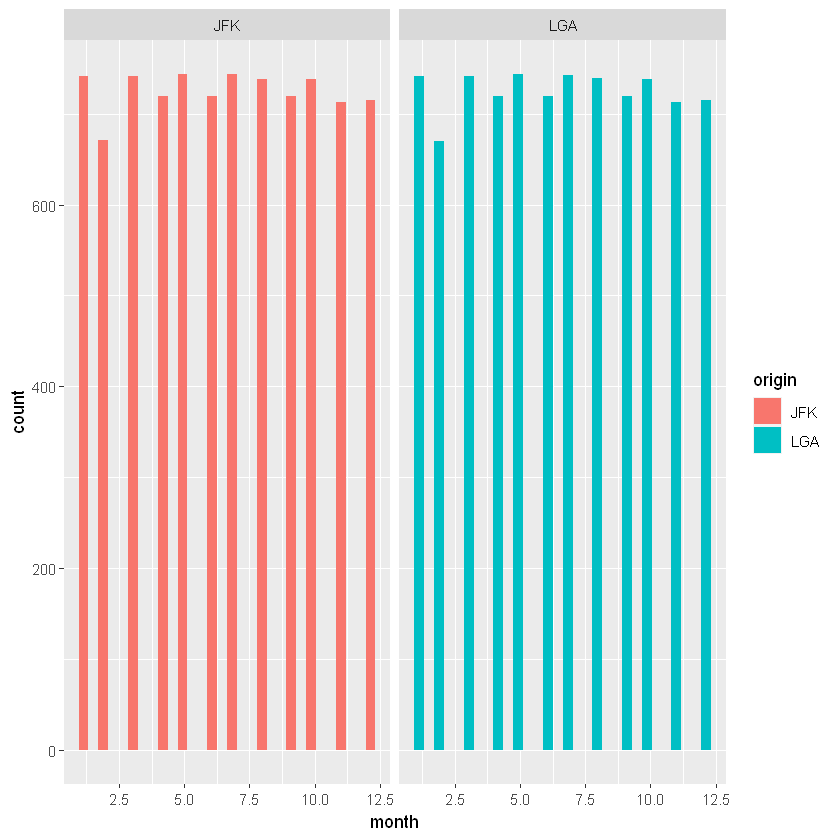

In [14]:
options(scipen = 999, digits = 3) # Simplify display formats
tab_cnt_year <- table(df_csv$origin,df_csv$year) # contingency table by origin and year fields
tab_cnt_month <- table(df_csv$origin,df_csv$month) # contingency table by origin and month fields
prop.table(tab_cnt_year) # inspect the tab_cnt_year in proportion
prop.table(tab_cnt_month) # inspect the tab_cnt_month in proportion 
ggplot(df_csv, aes(x=month, fill=origin)) + # plot the contingency table 
	  geom_histogram() +
	  facet_wrap(~origin) 

In [17]:
ggplot(df_csv,aes(x = temp)) + geom_histogram() + # histogram plot 
ggplot(df_csv,aes(x = temp)) + geom_density() + # Density plot 
ggplot(df_csv,aes(x=1,y=temp)) + geom_boxplot() + # Boxplot

ERROR: Error in parse(text = x, srcfile = src): <text>:4:0: unexpected end of input
2: ggplot(df_csv,aes(x = temp)) + geom_density() + # Density plot 
3: ggplot(df_csv,aes(x=1,y=temp)) + geom_boxplot() + # Boxplot 
  ^
